# Project: Investigate Medical Appointment No Shows Dataset 

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> A person makes a doctor appointment, receives all the instructions and no-show. Who to blame?
>
> To answer this question? we will analyse the present dataset, which holds the record of 110.527 medical appointments its 14 associated variables (instructions). The most important one if the patient show-up or no-show to the appointment.


In [3]:
# import required packages that I plan to use for this analysis.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> In this section of the report, data is been loaded, checked for data types anomalies and for unecessary duplicates that ma have incurred. These anomalies have been a subject of further cleaning.

### Initial Data Overview

> Load your data and print out a few lines. Perform operations to inspect data types and look for instances of missing or possibly errant data.

In [4]:
# Data loading
df = pd.read_csv("noshowappointments-kagglev2-may-2016.csv")
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [5]:
# Exploring data types and the count of non-null records of the dataset features
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [6]:
# Print statistics of the dataframe quantitative features
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [7]:
# Evaluate how many unique values in each feature
df.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

In [8]:
# Check the existence of duplicated records 
sum(df.duplicated())

0

### Overview Summary

> The present dataset has 110527 records, and no one them contain a null value, and it is also clean of duplicates. ScheduledDay and AppointmentDay data contain string data formatted following date time manner which seems unpractical to handle. The solution in to convert data in this column to date time object and keep only the date of the days (no need for the time part). Other columns needs to be removed from the dataframe as they represent data that seem irrelevant to our analysis (the influence of PatientId, AppointmentID on the No-show for instance) and therefore aren't required for this analysis.

### Data Cleaning
- AppointmentID is not important for our analysis, so we will drop it from the dataframe
- To avoid any confusion in No-Show value, we will change the logic to "Show" instead
- Convert ScheduledDay and AppointmentDay to appropriate date format
- The record -1 in the age column seems to be a typo, and likely to be meaning 1, so we will change this as well.

In [9]:
# Deleting unecessary columns to the analysis from the dataframe.
df.drop(['AppointmentID'], inplace=True, axis=1)
# Change the No-Show column to Show.
df.rename(columns={"No-show":"Show"},inplace=True)
df.Show = df.Show.map({'Yes': 'No', 'No': 'Yes'})
df.head()

,PatientId,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Show
0,2.987250e+13,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,Yes
1,5.589978e+14,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,Yes
2,4.262962e+12,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,Yes
3,8.679512e+11,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,Yes
4,8.841186e+12,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,Yes


In [10]:
# Change object data type of ScheduledDay and AppointmentDay to date time format.
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay']).dt.date
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay']).dt.date

In [11]:
# It is much practical to analyse the difference between ScheduledDay and AppointmentDay,therefore
# we will calculate its value and create a new column for it.
df['diff_AppointScheduled'] = (df['AppointmentDay'] - df['ScheduledDay']) / np.timedelta64(1, 'D')

In [12]:
# Correct the -1 value in Age column.
df.Age = df.Age.replace([-1],1)

In [13]:
# Last check of the cleaning outcomes.
df.describe()

,PatientId,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,diff_AppointScheduled
count,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,37.088892,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026,10.183702
std,2.560949e+14,23.110176,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873,15.254996
min,3.921784e+04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.000000
25%,4.172614e+12,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000
75%,9.439172e+13,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,15.000000
max,9.999816e+14,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,179.000000


<a id='eda'></a>
## Exploratory Data Analysis

> **Note**: Now that our data was cleaned out, Let's Look at the variable in the dataset, and then try to look at relationships between variables.

### Research Question 1: What are the proportions of No Show to the hospital by Gender and Neighnourhood?

In [18]:
# The same operations are done to extract the proportions of No Show whether by Gender or by Neighnourhood,
# which makes defining a function for this operation the best practice.
# NoShowProportions return a column indicating the proportions, ad takes two arguments: 
# df: the original dataframe , and the 
# factor: through which we make the grouping by.
def NoShowProportions(df, factor):
    Count = df.query("Show == 'No'").groupby(factor).count().PatientId
    Pct = 100 * Count / sum(Count)
    Pct = Pct.sort_values(ascending=False)
    return Pct

In [37]:
# Apply the function to get the proportions for the gender
NoShowProportions(df, "Gender")

Gender
F    65.388234
M    34.611766
Name: PatientId, dtype: float64

> **Note** : Since the nature of our dataframe stipulates to depicts numeric values against distinct categories in a two-axis plot, bar plots and pie plots present the best options to convey our conclusions. As we have only to caterogies in the proportion to be represented for gender grouping, the best option for a plot here is the pie plot. With a bar chart, there is freedom on the numeric value axis and the amplitude of the values doesn't make a constraint for the plot anymore, which makes it suitable to plot the rest or our ccolumn data against the No-Show result.

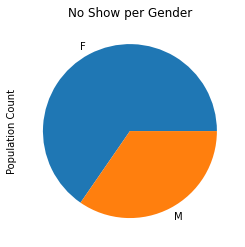

In [39]:
# Plot No-Show proportions by gender in a pie chart
NoShowProportions(df, "Gender").plot(kind='pie',y='Gender')
plt.gca().get_legend()
plt.title('No Show per Gender')
plt.ylabel("Population Count")
plt.show()

> **Observation 1:** Female population is recording a No-Show occurrences two times more than Male does.

In [19]:
# Apply the function to get the proportions by neighbourhood
NoShowProportions(df, "Neighbourhood")

Neighbourhood
JARDIM CAMBURI                 6.563914
MARIA ORTIZ                    5.461714
ITARARÉ                        4.135490
RESISTÊNCIA                    4.059322
CENTRO                         3.149783
                                 ...   
PONTAL DE CAMBURI              0.053766
ILHA DO BOI                    0.013441
ILHAS OCEÂNICAS DE TRINDADE    0.008961
ILHA DO FRADE                  0.008961
AEROPORTO                      0.004480
Name: PatientId, Length: 80, dtype: float64

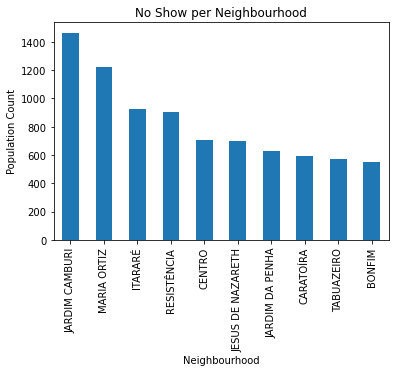

In [45]:
# Plot No-Show counts by Neighbourhood in a bar chart
df.query("Show == 'No'").groupby("Neighbourhood").count().sort_values(
    'PatientId').nlargest(10, 'PatientId').plot(kind='bar',y='PatientId')
plt.gca().get_legend().remove()
plt.title('No Show per Neighbourhood')
plt.ylabel("Population Count")
plt.show()

> **Observation 2:** Jardim Camburi is the ranked first by far from the other neighbourhoods to record most No-Show occurrences.

### Research Question 2 : What are the major factor among the presented in the dataset impacting the decision to show for medical appointment?

> This questions requires to understand how two different variables are related to each other (No-Show against any other qualitative variable existing in the dataframe). Cross tabulation helps us refactor our dataset in a much appropriate manner and conclude whether such relationship exists or not.

> We will start a simple investigation, by crossing No-Show against only one other variable), then we will get through a bit more complex cross tab, which will be for No-Show against two variables at the same time ( which will generate multiple combinations to be considered for the analysis)

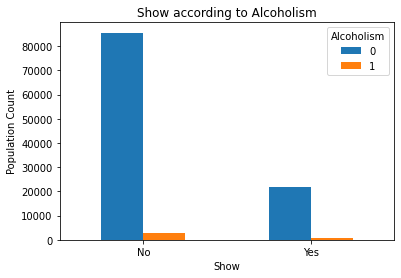

In [328]:
# Our first crosstab will be exposing No-Show against Alcoholism
crosstb = pd.crosstab(df.Show,[df.Alcoholism])
# The results of the crosstab is a barplot
barplot = crosstb.plot.bar(rot=0)
plt.title('Show according to Alcoholism')
plt.xlabel('Show')
plt.ylabel("Population Count")
plt.show()

> **Note 3:** Alcoholism doesn't appear to have an impact on people's attendance at appointments.

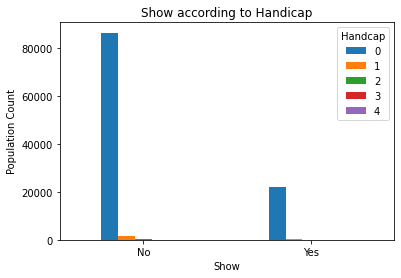

In [330]:
# This crosstab will be exposing No-Show against Handicaps levels
crosstb1 = pd.crosstab(df.Show,[df.Handcap])
# Likewise, The results of the crosstab is a barplot
barplot1 = crosstb1.plot.bar(rot=0)
plt.title('Show according to Handicap')
plt.xlabel('Show')
plt.ylabel("Population Count")
plt.show()

> **Note 4:** Handicap doesn't appear to have an impact on people's attendance at appointments.

### Research Question 3 : Is there any combination of factors among the presented in the dataset impacting the decision to show for medical appointment?

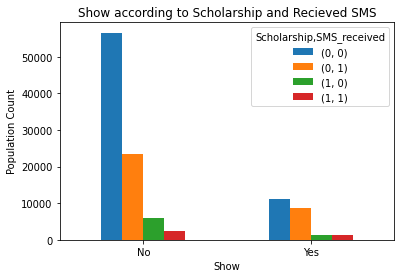

In [319]:
# This crosstab will be exposing No-Show against both whether the patient has a scholarship
# and if he has recieved the reminding SMS 
crosstb2 = pd.crosstab(df.Show,[df.Scholarship, df.SMS_received])
# Plot the result of the crosstab
barplot2 = crosstb1.plot.bar(rot=0)
plt.title('Show according to Scholarship and Recieved SMS')
plt.xlabel('Show')
plt.ylabel("Population Count")
plt.show()

> **Note 5:** Population who are not enrolled in Brasilian welfare and who do note recieve a reminder SMS seem to be the major part not attending their hospital appointments.

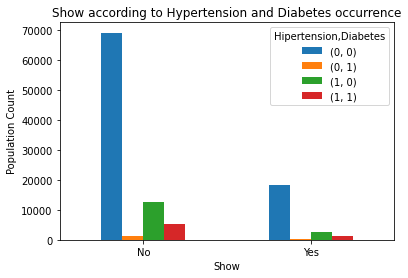

In [329]:
# Likewise for the hypertension and diabetes occurrence for the patient
crosstb3 = pd.crosstab(df.Show,[df.Hipertension, df.Diabetes])
# Plot the result of the crosstab
barplot3 = crosstb3.plot.bar(rot=0)
plt.title('Show according to Hypertension and Diabetes occurrence')
plt.xlabel('Show')
plt.ylabel("Population Count")
plt.show()

> **Note 5:** Hypertension and diabetes don't seem to have an impact on people's attendance at appointments.

<a id='conclusions'></a>
## Conclusions

> We were able to draw some important conclusions from the analysis of this dataset, which we may sum up in the following points:
- Female population records twice as many No-Show incidents than male population does.
- The majority of people who do not show up for their medical appointments appear to be those who are not enrolled in Brazilian assistance and who do not receive a reminder SMS.
- Disability, alcoholism, diabetes, and hypertension don't seem to affect people's ability to keep appointments.

### Limitations to this analysis:
> Despite the important number of records present in this dataset, I found that most parameters do not influence on the No-Show decision for the population presented here. An explanation to this may be that the binary nature of the values in most columns is perhaps behind such results, and I suppose that these would be different if the parameters have been recorded in a quantitative way and with a higher degree of freedom and could have yielded to much more interesting results.